#### Sanjana Jadhav (CS 4375.004)

# Image Classification using Deep Learning

#### In this notebook, we will try to classify cards using the following three models: Sequential Model, Convolutional Neural Networks Model, & Pre-Trained (Transfer Learning) Model
#### Dataset: https://www.kaggle.com/datasets/gpiosenka/cards-image-datasetclassification (this dataset was already split into train and test)
#### Other Sources: Slides, Textbook, Professor Mazidi's Github + other sources listed below

### **Data Processing + Visualization**

#### **import numpy, pandas, & tensorflow**
* numpy: numerical computing library
* pandas: data analysis library
* tensorflow: used to build/train neural network models

In [2]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt


#### **import train/test data**
* use tf to import train/test data 
* source: https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory
* important parameters: image size (224 x 224), seed=1234 (for reproducibility), batch size is 32

In [4]:

train = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/input/cards-image-datasetclassification/train",
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(224, 224),
    seed=1234,
    batch_size=32,
)

test = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/input/cards-image-datasetclassification/test",
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(224, 224),
    seed=1234,
    batch_size=32,
)

Found 7624 files belonging to 53 classes.
Found 265 files belonging to 53 classes.


### **Print/Plot Class Distribution**
#### **Sources Used:**
* https://docs.python.org/3/library/os.html
* https://realpython.com/python-zip-function/
* https://stackoverflow.com/questions/28663856/how-do-i-count-the-occurrence-of-a-certain-item-in-an-ndarray
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html

In [33]:
print(train.class_names)

# set number of classes
num_classes = len(train.class_names)

['ace of clubs', 'ace of diamonds', 'ace of hearts', 'ace of spades', 'eight of clubs', 'eight of diamonds', 'eight of hearts', 'eight of spades', 'five of clubs', 'five of diamonds', 'five of hearts', 'five of spades', 'four of clubs', 'four of diamonds', 'four of hearts', 'four of spades', 'jack of clubs', 'jack of diamonds', 'jack of hearts', 'jack of spades', 'joker', 'king of clubs', 'king of diamonds', 'king of hearts', 'king of spades', 'nine of clubs', 'nine of diamonds', 'nine of hearts', 'nine of spades', 'queen of clubs', 'queen of diamonds', 'queen of hearts', 'queen of spades', 'seven of clubs', 'seven of diamonds', 'seven of hearts', 'seven of spades', 'six of clubs', 'six of diamonds', 'six of hearts', 'six of spades', 'ten of clubs', 'ten of diamonds', 'ten of hearts', 'ten of spades', 'three of clubs', 'three of diamonds', 'three of hearts', 'three of spades', 'two of clubs', 'two of diamonds', 'two of hearts', 'two of spades']


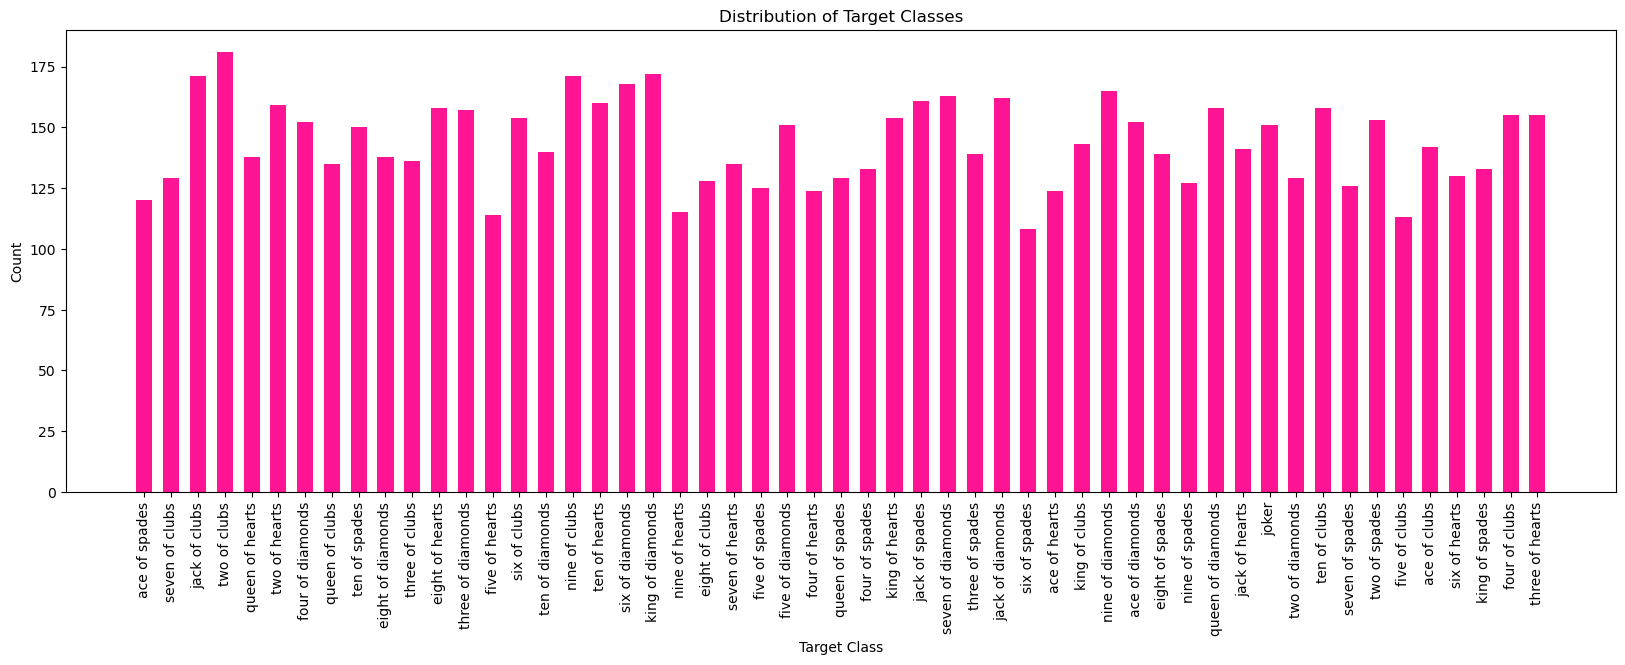

In [5]:
import os

# Get the class names and indices
class_names = os.listdir("/kaggle/input/cards-image-datasetclassification/train")
class_indices = dict(zip(class_names, range(len(class_names))))

# Get class counts
class_counts = np.zeros(len(class_names))
for images, labels in train:
    class_counts += np.sum(labels.numpy(), axis=0)

# Increase size of graph for readibility
plt.figure(figsize=(20, 6))

# Create a bar graph
plt.bar(class_names, class_counts, width=0.6, align='center', color='deeppink')
plt.title('Distribution of Target Classes')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Print graph
plt.show()

### **Plot Sample Images from Training Data**
#### **Source Used:**
* https://github.com/kjmazidi/Intro-to-Deep-Learning/blob/main/Part%202%20Deep%20Learning%20with%20TF%20Keras/3e-Cats%20and%20dogs%20classification.ipynb

* As we can see, it is hard to see the images.

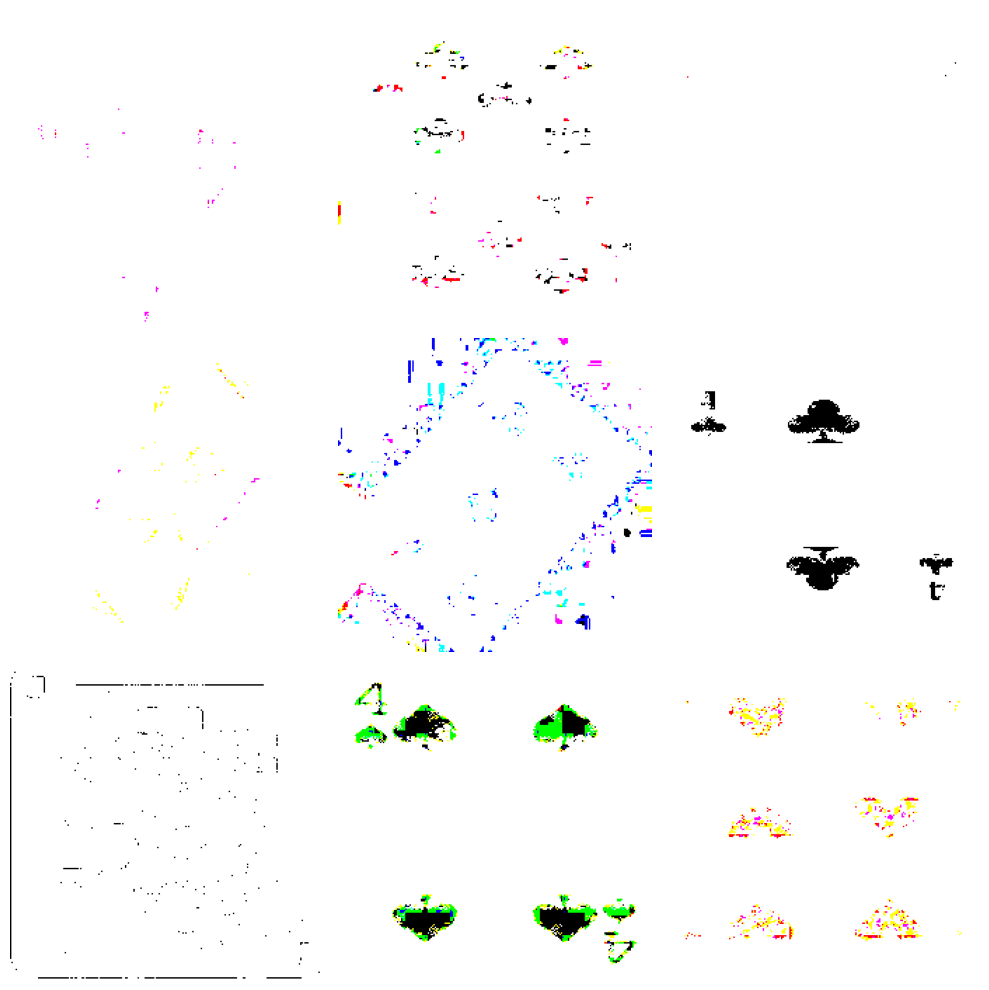

In [27]:
def plotImages(images_arr):
    fig, axes = plt.subplots(3, 3, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Get a batch of images and labels from the dataset
images, labels = next(iter(train))
image_batch = images.numpy()

# Plot the images in a 3x3 grid
plotImages(image_batch[:9])

### **Sequential Model**
* input layer: image size is 224 x 224 and channels = 3
* rescale the image between [0,1]
* flattens tensor into 1d array
* create a dense layer with 256 neurons and relu activation
* drop (0.5) to prevent overfitting
* create another dense layer with 128 neurons and relu activation
* drop (0.5) to prevent overfitting
* create another a dense layer with 53 neurons (num_classes) and softmax activation (used for multi-class classification to output probabilities)

In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

#### **Compile/Train Model**

In [35]:
# Compile Model
# Loss: categorical_crossentropy (used for multi-class classification for labels that must fit in one class)
# Optimizer: rmsprop 
# Metrics: Accuracy 
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Train model
# Train model using the training data, 10 epochs, a batch size of 32, and use the test data
history = model.fit(train,
                    epochs=10,
                    batch_size=32,
                    validation_data=test)

Epoch 1/10
239/239 [==============================] - 98s 406ms/step - loss: 16.4403 - accuracy: 0.0197 - val_loss: 3.9690 - val_accuracy: 0.0189
Epoch 2/10
239/239 [==============================] - 97s 407ms/step - loss: 4.0418 - accuracy: 0.0219 - val_loss: 3.9703 - val_accuracy: 0.0189
Epoch 3/10
239/239 [==============================] - 98s 410ms/step - loss: 3.9663 - accuracy: 0.0233 - val_loss: 3.9647 - val_accuracy: 0.0226
Epoch 4/10
239/239 [==============================] - 99s 412ms/step - loss: 3.9661 - accuracy: 0.0239 - val_loss: 3.9701 - val_accuracy: 0.0189
Epoch 5/10
239/239 [==============================] - 96s 402ms/step - loss: 3.9651 - accuracy: 0.0237 - val_loss: 3.9686 - val_accuracy: 0.0189
Epoch 6/10
239/239 [==============================] - 95s 398ms/step - loss: 3.9636 - accuracy: 0.0240 - val_loss: 4.0178 - val_accuracy: 0.0189
Epoch 7/10
239/239 [==============================] - 95s 397ms/step - loss: 4.1082 - accuracy: 0.0240 - val_loss: 3.9845 - val_a

#### **Summary**
* rescale layer
* flatten layer
* dense layer (256 neurons and 38535424 trainable parameters)
* dropout layer
* dense layer (128 neurons and 32896 trainable parameters)
* dropout later
* dense layer (53 neurons and 6837 trainable parameters)

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_2 (Dense)             (None, 256)               38535424  
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 53)                6

#### **Plot the Model Metrics for each Epoch**

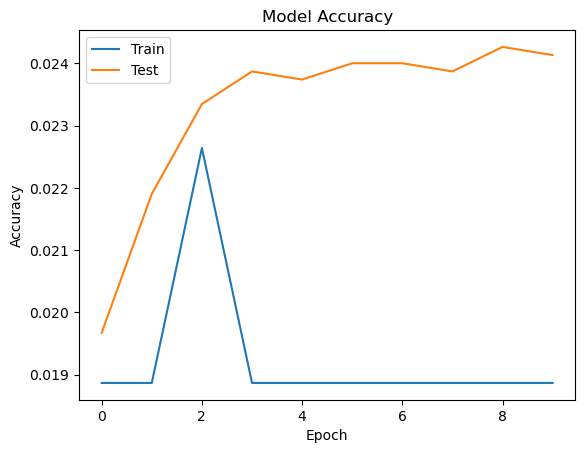

Test Loss: 3.9936933517456055
Test Accuracy: 0.01886792480945587


In [38]:

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

score = model.evaluate(test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

#### **Test using an Image**

1/1 [==============================] - 0s 43ms/step
Class: two of clubs


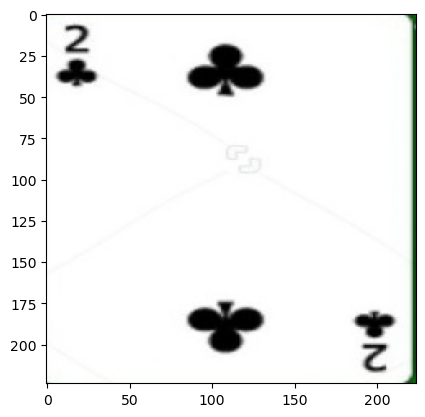

In [94]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load and preprocess the image
img_path = '/kaggle/input/cards-image-datasetclassification/train/two of clubs/001.jpg'
img = load_img(img_path, target_size=(224, 224))
img_arr = img_to_array(img) / 255.0
img_arr = img_arr.reshape((1, 224, 224, 3))

# Get the model's prediction for the image
prediction = model.predict(img_arr)

# Print the predicted class and its probability
class_index = prediction.argmax()
print(f"Class: {class_names[class_index]}")

# Plot Card Image
plt.imshow(img)

#### **Analysis**
According to the results, the Sequential model achieved a very low test accuracy of approximately 2%. However, it correctly predicted the image class.  This could be due to the fact that sequential models are typically designed for analyzing sequential data and may not be the most suitable choice for image analysis. Furthermore, a more complex architecture such as a CNN may be necessary to accurately extract features and classify the images in this dataset.

### **Convolutional Neural Network Model**
* rescale image: normalize pixels values & image size is 224 x 224 and channels = 3
* create a convolutional layer with 32 filters, same padding and relu activation
* max pooling
* create another convolutional layer with 64 filters, same padding and relu activation
* max pooling
* create another convolutional layer with 128 filters, same padding and relu activation
* max pooling
* flattens tensor into 1d array
* drop (0.5) to prevent overfitting
* create a dense layer with 128 neurons and relu activation
* create a dense layer with 53 neurons and softmax activation (used for multi-class classification to output probabilities)

In [75]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model2 = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation="softmax"),
])

#### **Compile/Train Model**

In [76]:
# Compile Model
# Loss: categorical_crossentropy (used for multi-class classification for labels that must fit in one class)
# Optimizer: adam 
# Metrics: Accuracy 
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train model
# Train model using the training data, 5 epochs, a batch size of 32, and use the test data
history = model2.fit(train,
                    epochs=10,
                    batch_size=32,
                    verbose=1,
                    validation_data=test)

Epoch 1/10
239/239 [==============================] - 511s 2s/step - loss: 2.9106 - accuracy: 0.2695 - val_loss: 1.7924 - val_accuracy: 0.4868
Epoch 2/10
239/239 [==============================] - 510s 2s/step - loss: 1.7400 - accuracy: 0.5323 - val_loss: 1.4465 - val_accuracy: 0.6264
Epoch 3/10
239/239 [==============================] - 508s 2s/step - loss: 1.1108 - accuracy: 0.6929 - val_loss: 1.2129 - val_accuracy: 0.7170
Epoch 4/10
239/239 [==============================] - 512s 2s/step - loss: 0.6922 - accuracy: 0.8072 - val_loss: 1.1641 - val_accuracy: 0.7585
Epoch 5/10
239/239 [==============================] - 502s 2s/step - loss: 0.4315 - accuracy: 0.8741 - val_loss: 1.2727 - val_accuracy: 0.7660
Epoch 6/10
239/239 [==============================] - 506s 2s/step - loss: 0.3062 - accuracy: 0.9138 - val_loss: 1.4705 - val_accuracy: 0.7736
Epoch 7/10
239/239 [==============================] - 505s 2s/step - loss: 0.2214 - accuracy: 0.9366 - val_loss: 1.4773 - val_accuracy: 0.7887

#### **Summary**
* rescale layer
* 2d conv layer with 32 filters (896 trainable parameters)
* max pooling layer
* 2d conv layer with 64 filters (18496 trainable parameters)
* max pooling layer
* 2d conv layer with 64 filters (73856 trainable parameters)
* max pooling layer
* flatten layer
* dropout layer
* dense layer (128 neurons and 12845184 trainable parameters)
* dense layer (53 neurons and 6837 trainable parameters)

In [77]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)      

#### **Plot the Model Metrics for each Epoch**

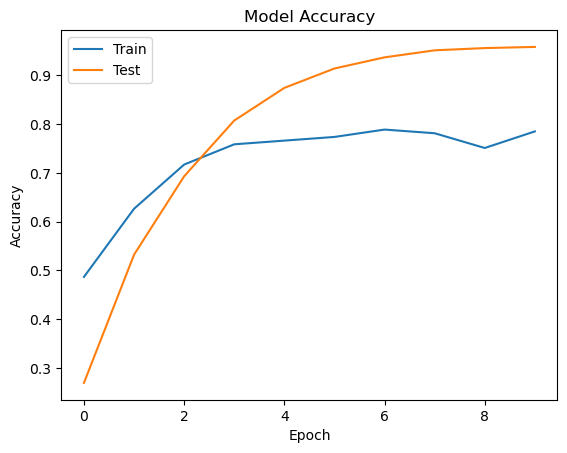

Test Loss: 1.6257838010787964
Test Accuracy: 0.7849056720733643


In [78]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

score = model2.evaluate(test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

#### **Test using an Image**

1/1 [==============================] - 0s 46ms/step
Class: three of diamonds


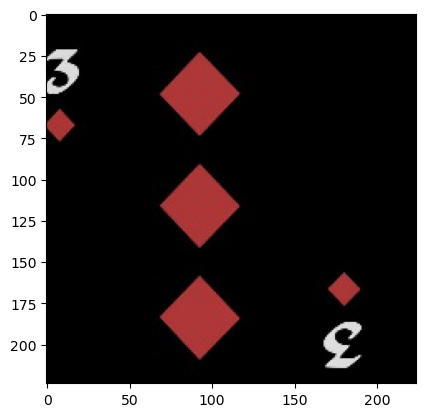

In [107]:
# Load and preprocess the image
img_path = '/kaggle/input/cards-image-datasetclassification/train/three of diamonds/010.jpg'
img = load_img(img_path, target_size=(224, 224))
img_arr = img_to_array(img) / 255.0
img_arr = img_arr.reshape((1, 224, 224, 3))

# Get the model's prediction for the image
prediction = model2.predict(img_arr)

# Print the predicted class and its probability
class_index = prediction.argmax()
print(f"Class: {class_names[class_index]}")

# Plot Card Image
plt.imshow(img)

#### **Analysis**
Our Convolutional Neural Network (CNN) model has a high accuracy (~78%) and predicted the image correctly due to its ability to learn hierarchical representations, where each layer learns progressively more complex features. Moreover, CNNs reduce the input's dimensionality using convolutional and pooling layers, and control overfitting through methods like dropout. Additionally, having a large dataset is beneficial to predict better on unseen data.

### **Pre-Trained Model: MobileNet (V2)**
#### Source: https://www.kaggle.com/code/paultimothymooney/mobilenetv2-with-tensorflow

#### **Steps**
* Resize the Data: 128 x 128
* Load the Pre-Trained Model
* Define a Sequential Model
* Provide Build Parameters
* Compile the Model
* Train Model

In [46]:
import tensorflow_hub as hub

# Resize the Training Data to 128 x 128
train2 = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/input/cards-image-datasetclassification/train",
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128, 128),
    seed=1234,
    batch_size=32,
)

# Resize the Testing Data to 128 x 128
test2 = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/input/cards-image-datasetclassification/test",
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128, 128),
    seed=1234,
    batch_size=32,
)
    
# Load the Pre-Trained Model (1st layer)
keras_layer = hub.KerasLayer('https://kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/035-128-classification/versions/2')

# Define a Sequential Model:
# Neural Network with 53 neurons (2nd layer)
# Softmax Activation: used for multi-class classification to find probabilities for each class (53 classes)
model3 = tf.keras.Sequential([
    keras_layer,
    tf.keras.layers.Dense(53, activation='softmax')
])

# Build Parameters:
# None: Batch size is not specified
# Shape of the Input: 128 x 128
# Channels: 3
model3.build([None, 128, 128, 3])

# Compile Model
# Loss: categorical_crossentropy (used for multi-class classification for labels that must fit in one class)
# Optimizer: adam 
# Metrics: Accuracy 
model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train model
# Train model using the training data, 10 epochs, a batch size of 32, and use the test data
history = model3.fit(train2,
                    epochs=10,
                    batch_size=32,
                    verbose=1,
                    validation_data=test2)

Found 7624 files belonging to 53 classes.
Found 265 files belonging to 53 classes.
Epoch 1/10
239/239 [==============================] - 27s 97ms/step - loss: 3.6103 - accuracy: 0.1177 - val_loss: 3.2053 - val_accuracy: 0.1623
Epoch 2/10
239/239 [==============================] - 22s 92ms/step - loss: 3.1194 - accuracy: 0.1973 - val_loss: 3.0436 - val_accuracy: 0.2075
Epoch 3/10
239/239 [==============================] - 23s 94ms/step - loss: 2.9407 - accuracy: 0.2419 - val_loss: 3.0186 - val_accuracy: 0.2000
Epoch 4/10
239/239 [==============================] - 22s 92ms/step - loss: 2.8170 - accuracy: 0.2638 - val_loss: 3.0124 - val_accuracy: 0.2453
Epoch 5/10
239/239 [==============================] - 22s 93ms/step - loss: 2.7505 - accuracy: 0.2790 - val_loss: 2.9150 - val_accuracy: 0.2377
Epoch 6/10
239/239 [==============================] - 23s 94ms/step - loss: 2.6671 - accuracy: 0.3006 - val_loss: 2.8888 - val_accuracy: 0.2415
Epoch 7/10
239/239 [==============================] -

#### **Summary**
* Pre-trained MobileNet (V2) Model (1692489 trainable parameters)
* neural network with 53 classes (53,106 trainable parameters)

In [47]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              1692489   
                                                                 
 dense_5 (Dense)             (None, 53)                53106     
                                                                 
Total params: 1,745,595
Trainable params: 53,106
Non-trainable params: 1,692,489
_________________________________________________________________


#### **Plot the Model Metrics for each Epoch**

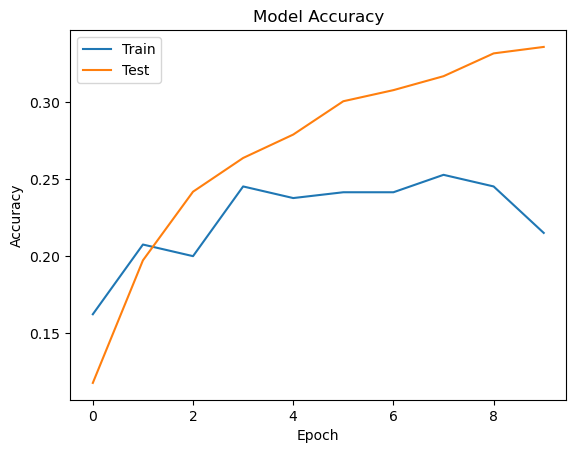

Test Loss: 2.962161064147949
Test Accuracy: 0.21509434282779694


In [49]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

score = model3.evaluate(test2, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

#### **Test using an Image**

1/1 [==============================] - 0s 30ms/step
Class: queen of clubs


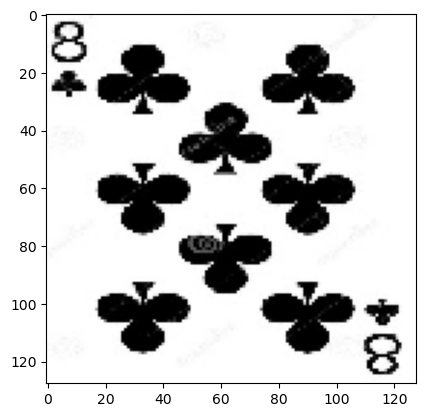

In [95]:
# Load and preprocess the image
img_path = '/kaggle/input/cards-image-datasetclassification/train/eight of clubs/011.jpg'
img = load_img(img_path, target_size=(128, 128))
img_arr = img_to_array(img) / 255.0
img_arr = img_arr.reshape((1, 128, 128, 3))

# Get the model's prediction for the image
prediction = model3.predict(img_arr)

# Print the predicted class and its probability
class_index = prediction.argmax()
print(f"Class: {class_names[class_index]}")

# Plot Card Image
plt.imshow(img)

### **Fine-Tune the Pre-Trained Model: MobileNet (V2)**
#### Source: https://www.kaggle.com/code/paultimothymooney/mobilenetv2-with-tensorflow

#### **Steps**
Define a Sequential Model
* Provide Build Parameters
* Compile the Model
* Train Model

In [128]:
# Define a Sequential Model:
# Rescale
# Neural Network with 128 neurons (2nd layer)
# Dropout to prevent Overfitting
# Neural Network with 53 neurons (3rd layer)
# Softmax Activation: used for multi-class classification to find probabilities for each class (53 classes)
model4 = tf.keras.Sequential([
    keras_layer,
    tf.keras.layers.Rescaling(1./127.5, offset=-1),  
    tf.keras.layers.Dense(128, activation='softmax'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(53, activation='softmax')
])

# Build Parameters:
# None: Batch size is not specified
# Shape of the Input: 128 x 128
# Channels: 3
model4.build([None, 128, 128, 3])

# Compile Model
# Loss: categorical_crossentropy (used for multi-class classification for labels that must fit in one class)
# Optimizer: adam (use learning rate)
# Metrics: Accuracy 
base_learning_rate = 0.0001
model4.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              metrics=['accuracy'])

# Train model
# Train model using the training data, 10 epochs, a batch size of 32, and use the test data
history = model4.fit(train2,
                    epochs=10,
                    batch_size=100,
                    verbose=1,
                    validation_data=test2)

Epoch 1/10
239/239 [==============================] - 25s 98ms/step - loss: 3.9704 - accuracy: 0.0192 - val_loss: 3.9732 - val_accuracy: 0.0189
Epoch 2/10
239/239 [==============================] - 23s 96ms/step - loss: 3.9698 - accuracy: 0.0212 - val_loss: 3.9709 - val_accuracy: 0.0189
Epoch 3/10
239/239 [==============================] - 23s 95ms/step - loss: 3.9694 - accuracy: 0.0219 - val_loss: 3.9710 - val_accuracy: 0.0189
Epoch 4/10
239/239 [==============================] - 22s 93ms/step - loss: 3.9681 - accuracy: 0.0202 - val_loss: 3.9711 - val_accuracy: 0.0189
Epoch 5/10
239/239 [==============================] - 23s 95ms/step - loss: 3.9682 - accuracy: 0.0210 - val_loss: 3.9712 - val_accuracy: 0.0189
Epoch 6/10
239/239 [==============================] - 23s 95ms/step - loss: 3.9678 - accuracy: 0.0222 - val_loss: 3.9717 - val_accuracy: 0.0189
Epoch 7/10
239/239 [==============================] - 23s 96ms/step - loss: 3.9688 - accuracy: 0.0209 - val_loss: 3.9715 - val_accuracy:

#### **Summary**
* Pre-trained MobileNet (V2) Model (1692489 trainable parameters)
* rescale layer
* dense layer (128 neurons and 128256 trainable parameters)
* dropout layer
* dense layer (53 neurons and 6837 trainable parameters)

In [129]:
model4.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              1692489   
                                                                 
 rescaling_8 (Rescaling)     (None, 1001)              0         
                                                                 
 dense_25 (Dense)            (None, 128)               128256    
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_26 (Dense)            (None, 53)                6837      
                                                                 
Total params: 1,827,582
Trainable params: 135,093
Non-trainable params: 1,692,489
_________________________________________________________________


#### **Plot the Model Metrics for each Epoch**

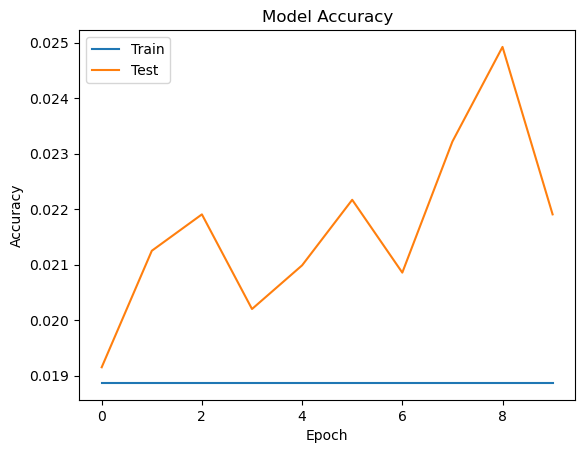

Test Loss: 3.971834897994995
Test Accuracy: 0.01886792480945587


In [130]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

score = model4.evaluate(test2, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

#### **Test using an Image**

1/1 [==============================] - 0s 30ms/step
Class: queen of clubs


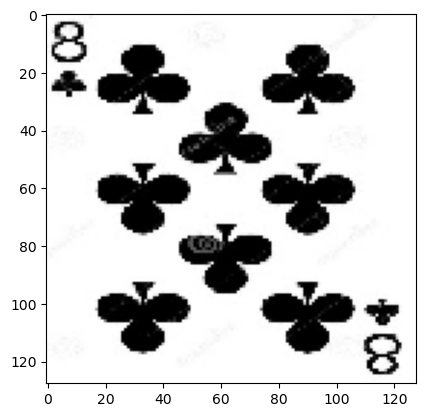

In [131]:
# Load and preprocess the image
img_path = '/kaggle/input/cards-image-datasetclassification/train/eight of clubs/011.jpg'
img = load_img(img_path, target_size=(128, 128))
img_arr = img_to_array(img) / 255.0
img_arr = img_arr.reshape((1, 128, 128, 3))

# Get the model's prediction for the image
prediction = model3.predict(img_arr)

# Print the predicted class and its probability
class_index = prediction.argmax()
print(f"Class: {class_names[class_index]}")

# Plot Card Image
plt.imshow(img)


#### **Analysis**
As observed, the test accuracy obtained through transfer learning using the MobileNet (V2) model is quite low (~22% & ~2%). Additionally, the model predictions were wrong both times. One possible explanation for this could be that the MobileNet (V2) model was originally trained using the massive ImageNet dataset and may not be able to generalize well on our dataset, which is much smaller in comparison. Specifically, the ImageNet dataset contains 14,197,122 images, whereas ours only has 7,624 images. Hence, it is likely that the MobileNet (V2) model is too complex to effectively learn from our limited amount of data. It is worth noting that the pre-trained model used in this case is the one from Kaggle, not the original MobileNet V2 model developed by Google. This could also potentially explain the low accuracy observed in the results.

## **The CNN Model yields the highest accuracy for our data!**